In [ ]:
import pandas as pd

df = pd.read_csv('/content/parkinsons.csv')

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print("\nDataset Info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nStatistical summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-nul

In [ ]:
df.rename(columns={
    "MDVP:Fo(Hz)": "Fo(Hz)",
    "MDVP:Fhi(Hz)": "Fhi(Hz)",
    "MDVP:Flo(Hz)": "Flo(Hz)",
    "MDVP:Jitter(%)": "Jitter(%)",
    "MDVP:Jitter(Abs)": "Jitter(Abs)",
    "MDVP:RAP": "Jitter:RAP",
    "MDVP:PPQ": "Jitter:PPQ",
    "Jitter:DDP": "Jitter:DDP",
    "MDVP:Shimmer": "Shimmer",
    "MDVP:Shimmer(dB)": "Shimmer(dB)",
    "Shimmer:APQ3": "Shimmer:APQ3",
    "Shimmer:APQ5": "Shimmer:APQ5",
    "MDVP:APQ": "Shimmer:APQ11",
    "Shimmer:DDA": "Shimmer:DDA",
    "NHR": "NHR",
    "HNR": "HNR"
}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop(columns=['name'])

# Column features hard to get from audio isi lie hata raha hu !!
df = df.drop(columns=['RPDE'])
df = df.drop(columns=['DFA'])
df = df.drop(columns=['spread1'])
df = df.drop(columns=['spread2'])
df = df.drop(columns=['D2'])
df = df.drop(columns=['PPE'])

X = df.drop(columns=['status'])
y = df['status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training shape:", X_train_scaled.shape)
print("Testing shape:", X_test_scaled.shape)

Training shape: (156, 16)
Testing shape: (39, 16)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 172 to 131
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fo(Hz)         156 non-null    float64
 1   Fhi(Hz)        156 non-null    float64
 2   Flo(Hz)        156 non-null    float64
 3   Jitter(%)      156 non-null    float64
 4   Jitter(Abs)    156 non-null    float64
 5   Jitter:RAP     156 non-null    float64
 6   Jitter:PPQ     156 non-null    float64
 7   Jitter:DDP     156 non-null    float64
 8   Shimmer        156 non-null    float64
 9   Shimmer(dB)    156 non-null    float64
 10  Shimmer:APQ3   156 non-null    float64
 11  Shimmer:APQ5   156 non-null    float64
 12  Shimmer:APQ11  156 non-null    float64
 13  Shimmer:DDA    156 non-null    float64
 14  NHR            156 non-null    float64
 15  HNR            156 non-null    float64
dtypes: float64(16)
memory usage: 20.7 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

🔹 Logistic Regression Results:
Accuracy: 0.7435897435897436
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.83      0.83      0.83        29

    accuracy                           0.74        39
   macro avg       0.66      0.66      0.66        39
weighted avg       0.74      0.74      0.74        39

Confusion Matrix:
 [[ 5  5]
 [ 5 24]]
--------------------------------------------------
🔹 Random Forest Results:
Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39

Confusion Matrix:
 [[ 7  3]
 [ 1 28]]
--------------------------------------------------
🔹 SVM Results:
Accuracy: 0.8717948717948718
          

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.884475806451613

Test Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


Top 10 Important Features:
 NHR              0.119425
Fo(Hz)           0.115700
Jitter:DDP       0.091016
Flo(Hz)          0.080124
Fhi(Hz)          0.078846
Jitter:RAP       0.078723
Shimmer:APQ11    0.070256
Jitter(%)        0.053076
Shimmer:APQ5     0.047209
Jitter:PPQ       0.046170
dtype: float64


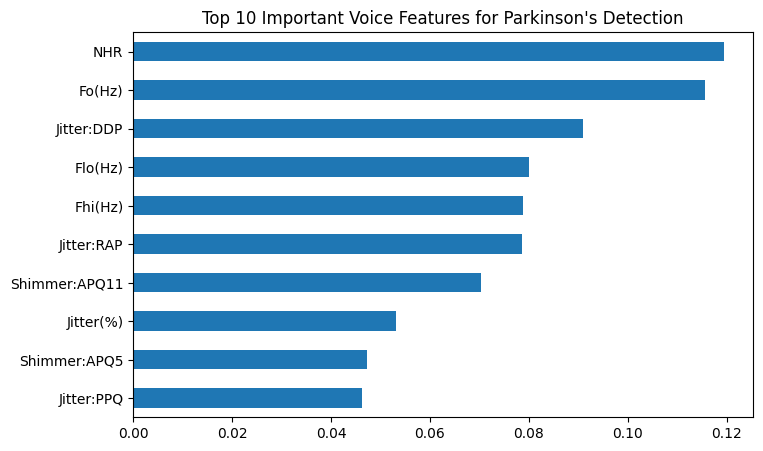

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", importances.head(10))

plt.figure(figsize=(8,5))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Voice Features for Parkinson's Detection")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top_features = [
    "NHR", "Fo(Hz)", "Jitter:DDP", "Flo(Hz)", "Fhi(Hz)",
    "Jitter:RAP", "Shimmer:APQ11", "Jitter(%)", "Shimmer:APQ5", "Jitter:PPQ"
]

X = df[top_features]
y = df["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

import os
import pickle

with open("classification.pkl", "wb") as f:
    pickle.dump(rf, f)
with open("scaler_classification.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully.")

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
✅ Model and Scaler saved successfully.


In [ ]:
# import os
# import pickle

# # Create the folder if it doesn’t exist
# os.makedirs("models", exist_ok=True)

# # Save model and scaler
# with open("models/classification.pkl", "wb") as f:
#     pickle.dump(best_rf, f)

# with open("models/scaler_classification.pkl", "wb") as f:
#     pickle.dump(scaler, f)

# print("✅ Tuned Random Forest model saved successfully as 'models/classification.pkl'")
# print("✅ Scaler saved successfully as 'models/scaler_classification.pkl'")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fo(Hz)         195 non-null    float64
 1   Fhi(Hz)        195 non-null    float64
 2   Flo(Hz)        195 non-null    float64
 3   Jitter(%)      195 non-null    float64
 4   Jitter(Abs)    195 non-null    float64
 5   Jitter:RAP     195 non-null    float64
 6   Jitter:PPQ     195 non-null    float64
 7   Jitter:DDP     195 non-null    float64
 8   Shimmer        195 non-null    float64
 9   Shimmer(dB)    195 non-null    float64
 10  Shimmer:APQ3   195 non-null    float64
 11  Shimmer:APQ5   195 non-null    float64
 12  Shimmer:APQ11  195 non-null    float64
 13  Shimmer:DDA    195 non-null    float64
 14  NHR            195 non-null    float64
 15  HNR            195 non-null    float64
 16  status         195 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 26.0 KB
